## Final Project Submission

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [28]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('TelcoCustomerChurnData.csv')

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [32]:
df = df.drop(['customerID'], axis=1)

In [33]:
for col in df.columns:
    print ('\n',col)
    print ('-------------------')
    print (df[col].unique())


 gender
-------------------
['Female' 'Male']

 SeniorCitizen
-------------------
[0 1]

 Partner
-------------------
['Yes' 'No']

 Dependents
-------------------
['No' 'Yes']

 tenure
-------------------
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService
-------------------
['No' 'Yes']

 MultipleLines
-------------------
['No phone service' 'No' 'Yes']

 InternetService
-------------------
['DSL' 'Fiber optic' 'No']

 OnlineSecurity
-------------------
['No' 'Yes' 'No internet service']

 OnlineBackup
-------------------
['Yes' 'No' 'No internet service']

 DeviceProtection
-------------------
['No' 'Yes' 'No internet service']

 TechSupport
-------------------
['No' 'Yes' 'No internet service']

 StreamingTV
-------------------
['No' 'Yes' 'No internet service']

 StreamingMovies
----------------

In [34]:
df.describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]).round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
10%,0.00,2.00,20.05
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
90%,1.00,69.00,102.60
99%,1.00,72.00,114.73


In [35]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
(df.TotalCharges == " ").sum()


11

In [37]:
df = df[df['TotalCharges'] != " "]


In [41]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [13]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
# df['Churn'] = df['Churn'].apply(lambda x: 0 if x=='No' else 1)
# df['Churn'] = [1 if i=='Yes' else 0 for i in df['Churn']]

In [52]:
df['gender'].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

In [ ]:
df = df.drop(['gender'], axis=1)

In [14]:
df_ohe =pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [15]:
df_ohe.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.5,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


### Saving the cleaned and one hot encoded data frame as a new data set.

In [ ]:
df.to_csv("TelcoCustomerChurnData_cleaned_ohe.csv", index=False)

# Exploratory Data Analysis

## Visualizations

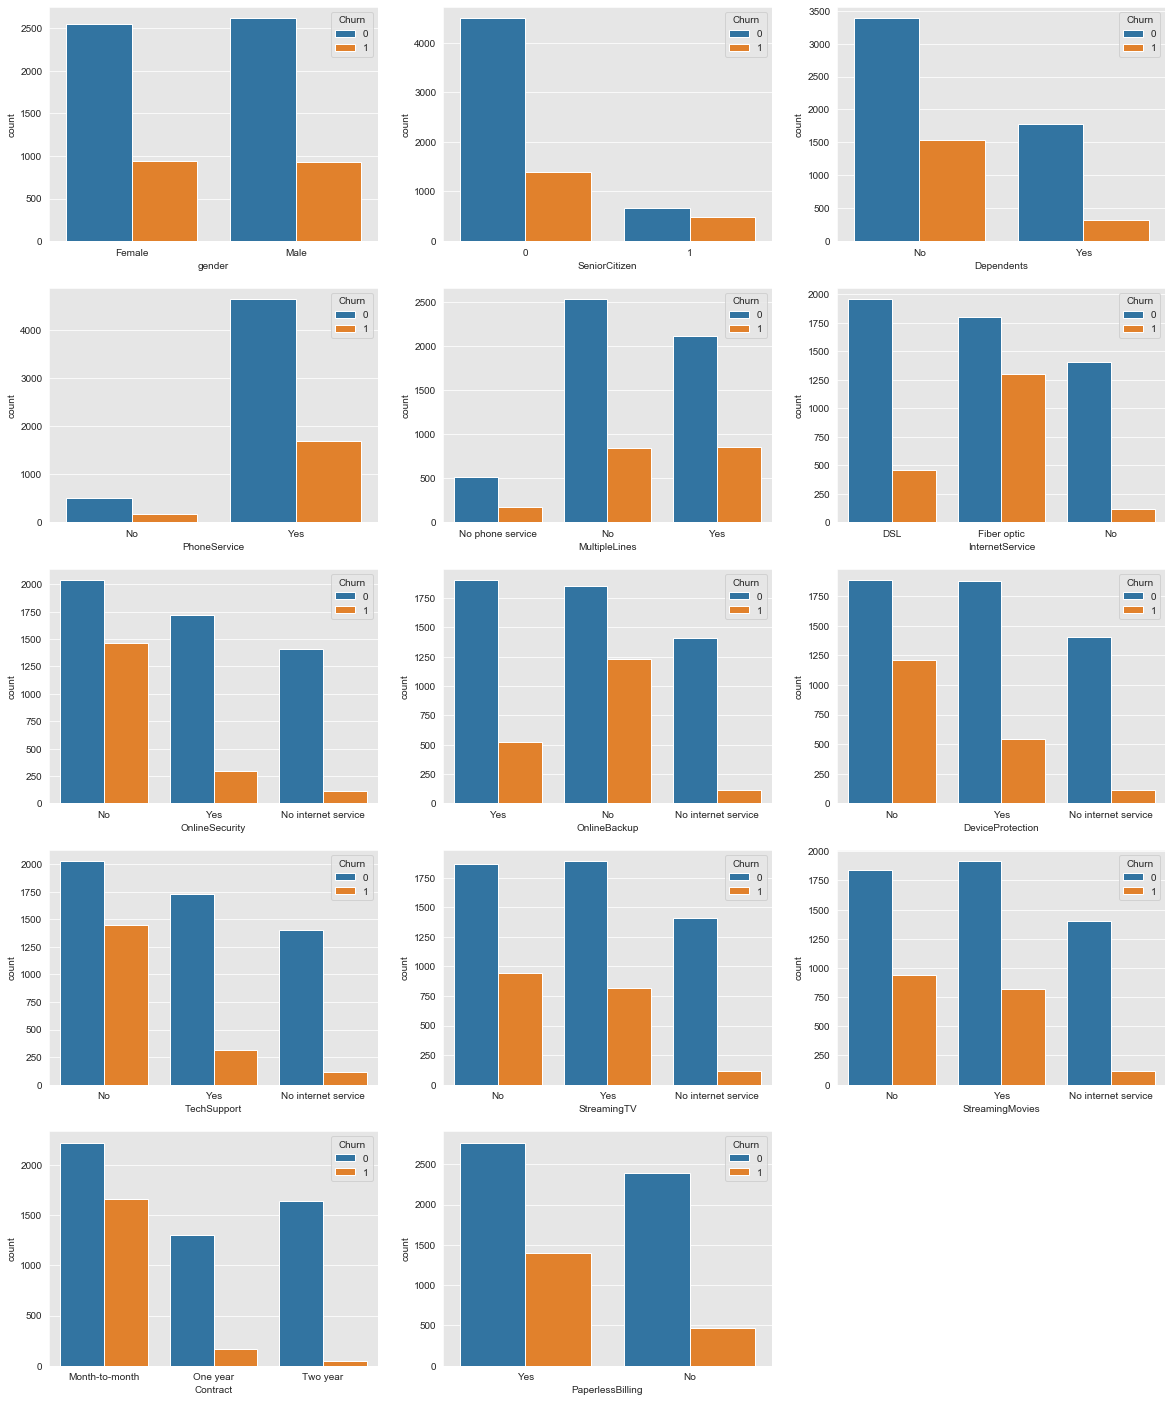

In [75]:
plt.figure(figsize=(20, 25))

plt.subplot(531)
sns.countplot(df['gender'],hue=df['Churn'])

plt.subplot(532)
sns.countplot(df['SeniorCitizen'],hue=df['Churn'])

plt.subplot(533)
sns.countplot(df['Dependents'],hue=df['Churn'])

plt.subplot(534)
sns.countplot(df['PhoneService'],hue=df['Churn'])

plt.subplot(535)
sns.countplot(df['MultipleLines'],hue=df['Churn'])

plt.subplot(536)
sns.countplot(df['InternetService'],hue=df['Churn'])

plt.subplot(537)
sns.countplot(df['OnlineSecurity'],hue=df['Churn'])

plt.subplot(538)
sns.countplot(df['OnlineBackup'],hue=df['Churn'])

plt.subplot(539)
sns.countplot(df['DeviceProtection'],hue=df['Churn'])

plt.subplot(5, 3, 10)
sns.countplot(df['TechSupport'],hue=df['Churn'])

plt.subplot(5,3,11)
sns.countplot(df['StreamingTV'],hue=df['Churn'])

plt.subplot(5,3,12)
sns.countplot(df['StreamingMovies'],hue=df['Churn'])

plt.subplot(5,3,13)
sns.countplot(df['Contract'],hue=df['Churn'])

plt.subplot(5,3,14)
sns.countplot(df['PaperlessBilling'],hue=df['Churn'])

plt.show()

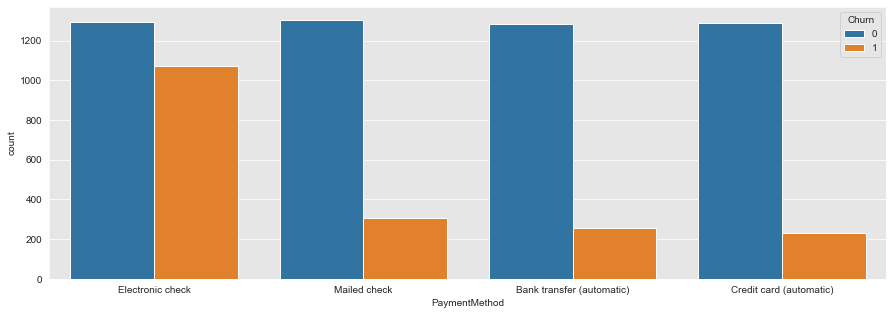

In [92]:
fig = plt.figure(figsize=(15, 5))
fig = sns.countplot(df['PaymentMethod'],hue=df['Churn'])

Monthly Charges plot
Total charges plot
df['MonthlyCharges'].hist()

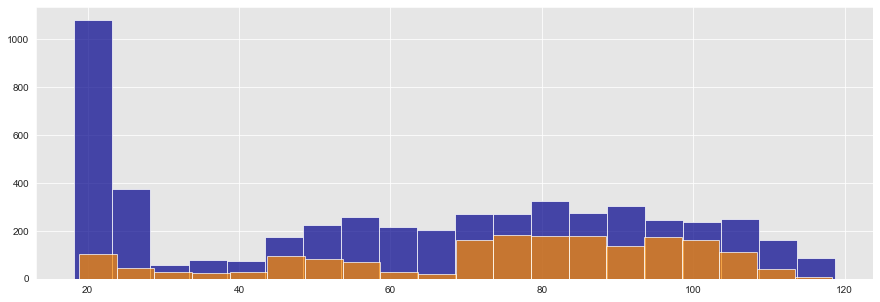

In [65]:
fig = plt.figure(figsize=(15, 5))
fig = df[df['Churn']=='No'].MonthlyCharges.hist(bins=20, color='darkblue', alpha=0.7)
fig = df[df['Churn']=='Yes'].MonthlyCharges.hist(bins=20, color='darkorange', alpha=0.7)

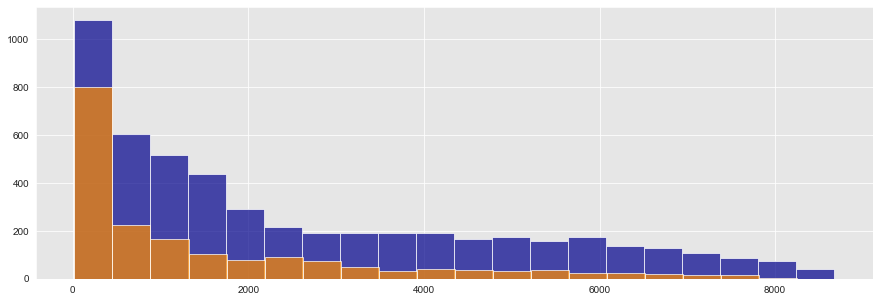

In [66]:
fig = plt.figure(figsize=(15, 5))
fig = df[df['Churn']=='No'].TotalCharges.hist(bins=20, color='darkblue', alpha=0.7)
fig = df[df['Churn']=='Yes'].TotalCharges.hist(bins=20, color='darkorange', alpha=0.7)

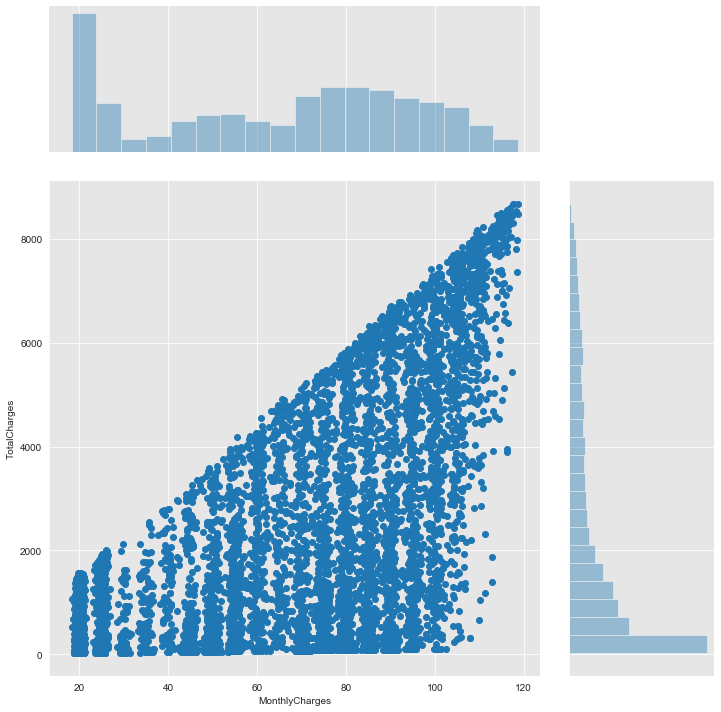

In [51]:

sns.jointplot(x='MonthlyCharges',y='TotalCharges', data=df, height= 10, ratio = 3);

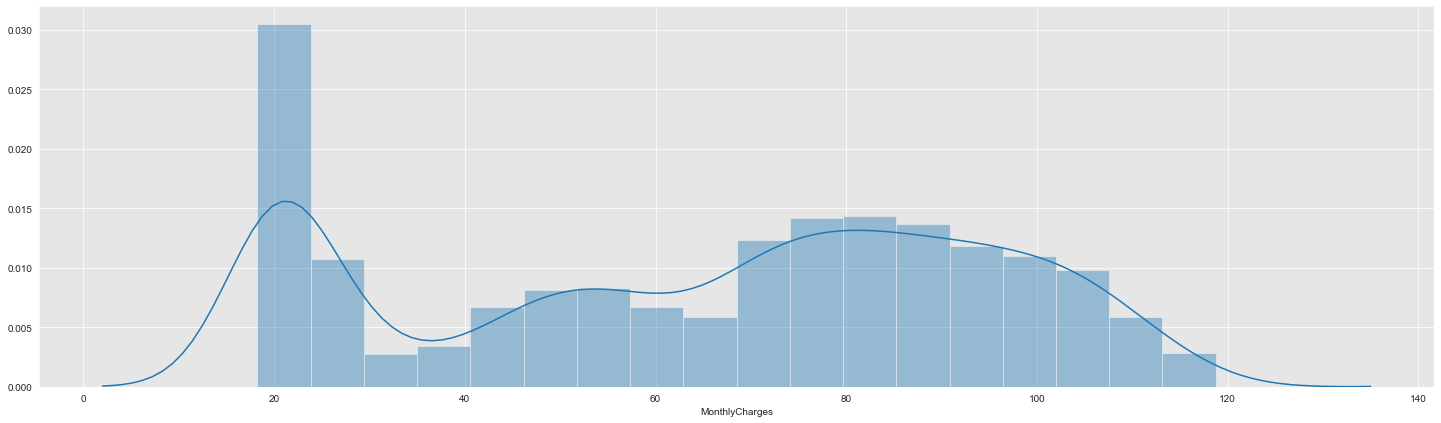

In [24]:
fig = plt.figure(figsize=(25, 7))
fig = sns.distplot(df['MonthlyCharges'])

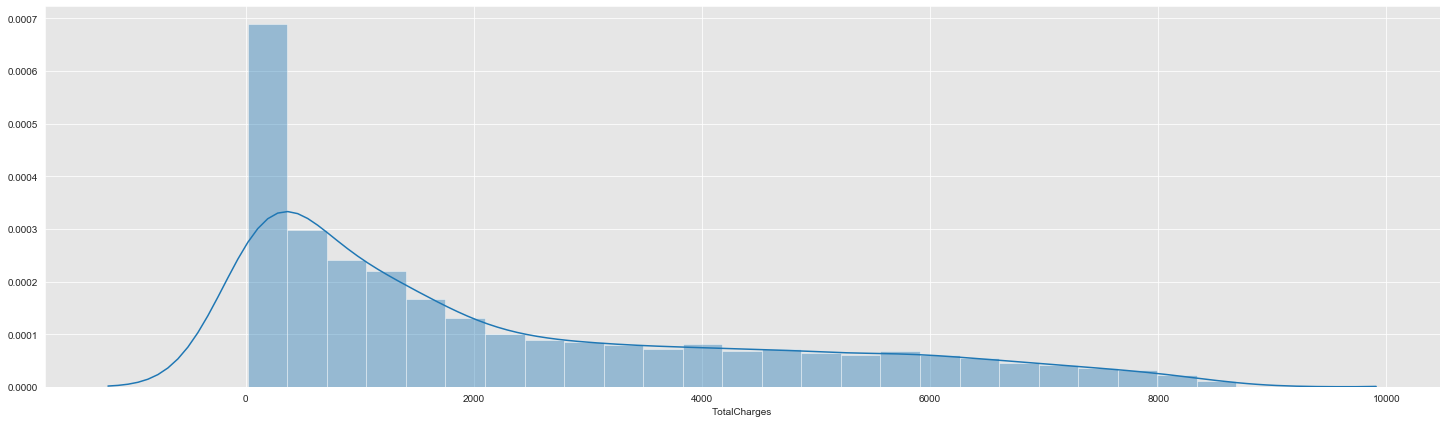

In [42]:
fig = plt.figure(figsize=(25, 7))
fig = sns.distplot(df['TotalCharges'])

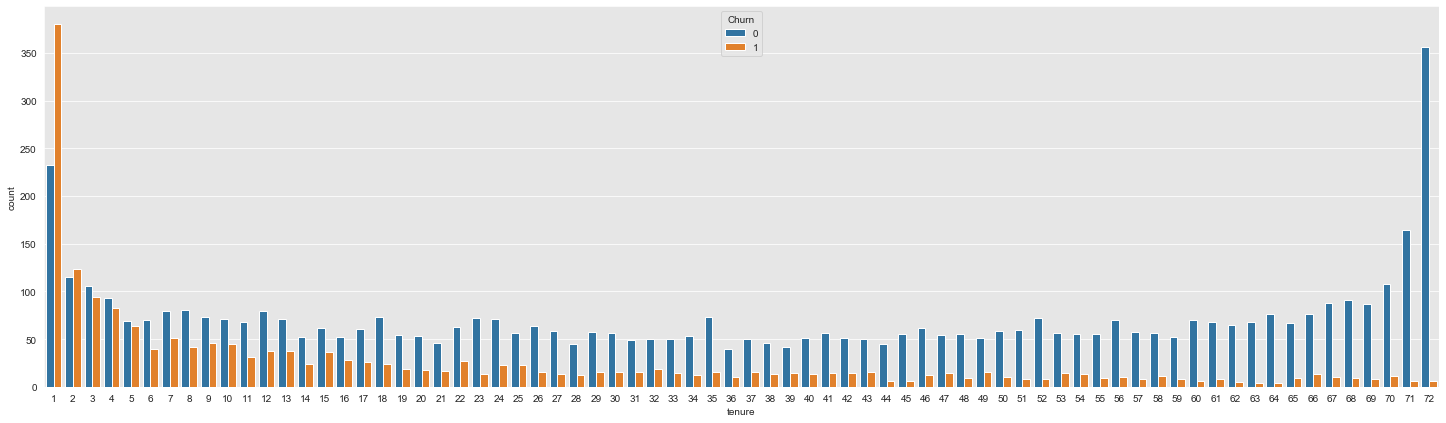

In [25]:
fig = plt.figure(figsize=(25, 7))
fig = sns.countplot(df['tenure'],hue=df['Churn'])

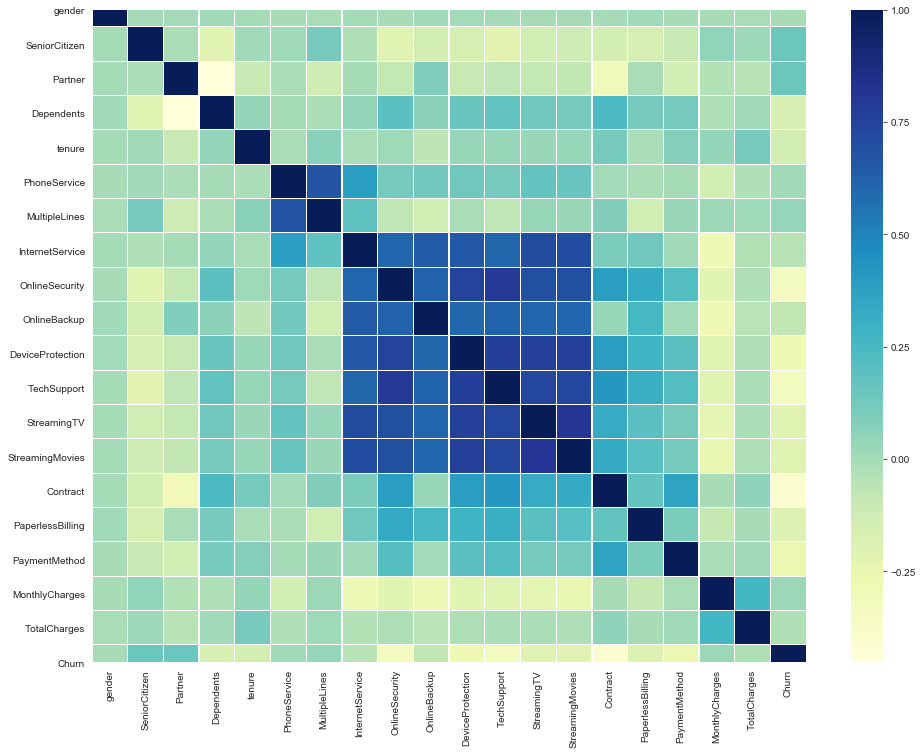

In [78]:
plt.figure(figsize=(16, 12))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

https://www.analyticsvidhya.com/blog/2020/03/google-colab-machine-learning-deep-learning/

https://jamesrledoux.com/code/grid_search

In [ ]:
#Report for all the models  in a dataframe

report_ = []
lines = classification_report(test_Y, predictions).split('\n')
for l in lines[2:-4]:
    row_ = l.split()
    if len(row_) != 0:
        row = {}
        row['precision'] = float(row_[-4])
        row['recall'] = float(row_[-3])
        row['f1_score'] = float(row_[-2])
        row['support'] = float(row_[-1])
        row['class'] = {1: "Churn", 0: "No Churn"}[int(row_[0])]
        report_.append(row)
dataframe = pd.DataFrame.from_dict(report_)
dataframe.head()

In [ ]:
#Confusion matrix in a better way
print("ROC AUC Score: {}\n\n".format(roc_auc_score(test_Y, prediction_proba[:, 1])))
print("Accuracy Score: {}\n\n".format(accuracy_score(test_Y, predictions)))

confusion_mat = confusion_matrix(test_Y, predictions, labels=[0, 1])
_row = confusion_mat.sum(axis=0)
_col = [np.nan] + list(confusion_mat.sum(axis=1)) + [sum(_row)]
con_df = pd.DataFrame({})
con_df["Predicted"] = ["Actual"] + ["No Churn", "Churn"] + ["All"]
for label, idx in {"No Churn": 0, "Churn": 1}.items():
    temp = [np.nan] + list(confusion_mat[:, idx]) + [_row[idx]]
    con_df[label] = temp

con_df["All"] = _col
print("Confusion Matrix\n")
con_df


### Yukaridaki fonksiyonlari aldigim yer. En sonda guzel bir rapor var.
https://www.kaggle.com/nicholasgah/churn-prediction-model-and-cap-curve